In [ ]:
!aws s3 cp s3://lowresolutionhighresolution/dataset/ . --recursive

In [5]:
!pip install --upgrade pip
!pip install -U opencv-python
!pip install -q tensorflow-probability
!apt-get upgrade
!apt-get update && apt install -y libsm6 libxext6 ffmpeg libfontconfig1 libxrender1 libgl1-mesa-glx

#!pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(np.__version__)


/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found
1.18.5


In [6]:
!pip install --upgrade 
!pip install numpy --upgrade
#!pip uninstall tensorflow 
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
#print(cv2.__version__)
# !conda install tensorflow-gpu=2.1
!pip install tensorflow==2.3.1

ERROR: You must give at least one requirement to install (see "pip help install")
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.1 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible

In [7]:
bucket = 'arn:aws:s3:::lowresolutionhighresolution'

import boto3
conn = boto3.client('s3')
response = conn.list_buckets()

# Output the bucket names
print('Existing buckets:')
for bucket in response['Buckets']:
    print(bucket["Name"])
# contents = conn.list_objects(Bucket=bucket)['Contents']
# conn.list_objects(Bucket='lowresolutionhighresolution')

Existing buckets:
aws-emr-resources-128812368847-us-west-2
aws-logs-128812368847-us-west-2
elasticbeanstalk-us-west-2-128812368847
lowresolutionhighresolution
raphaelalabi.com
sagemaker-studio-128812368847-4dx6ibast4b
videoimagescartoon


In [94]:
import tensorflow as tf 

def load_data(path):
    high_res_images = []
    low_res_images = []
    for dirname, _, filenames in os.walk(path+'high_res'):
        for filename in filenames:
            img = cv2.imread(os.path.join(dirname, filename))
            img = process_image(img)
            high_res_images.append(img)
        
    for dirname, _, filenames_2 in os.walk(path+'low_res'):
        for filename in filenames_2:
            if filename in filenames: # check for non-present images
                img = cv2.imread(os.path.join(dirname, filename))
                img = process_image(img)
                low_res_images.append(img)
    
    if False:
        # zero-mean and zero-center the standard deviations ....
        low_res_array = np.array(low_res_images)
        mean_centered_low_res = (low_res_array - low_res_array.mean())/low_res_array.std()
    
        # zero-mean and zero-center the standard deviations .....
        high_res_array = np.array(high_res_images)
        mean_centered_high_res = (high_res_array - high_res_array.mean())/high_res_array.std()
        return mean_centered_low_res, mean_centered_high_res
    
    return np.array(low_res_images), np.array(high_res_images )

def process_image(image):
    #return image
    return image/255

In [95]:
gpus = tf.config.list_physical_devices('GPU')
print (gpus)
base_dir = ''
train_x, train_y =  load_data(base_dir + 'train/')
val_x, val_y = load_data(base_dir + 'val/')
print (tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.3.1


(684, 256, 256, 3)
[[[0.04705882 0.05098039 0.0627451 ]
  [0.04705882 0.05098039 0.0627451 ]
  [0.05882353 0.06666667 0.08627451]
  ...
  [0.70196078 0.73333333 0.72156863]
  [0.67843137 0.69019608 0.64705882]
  [0.67843137 0.69019608 0.64705882]]

 [[0.04705882 0.05098039 0.0627451 ]
  [0.04705882 0.05098039 0.0627451 ]
  [0.05882353 0.06666667 0.08627451]
  ...
  [0.70196078 0.73333333 0.72156863]
  [0.67843137 0.69019608 0.64705882]
  [0.67843137 0.69019608 0.64705882]]

 [[0.06666667 0.0745098  0.09019608]
  [0.06666667 0.0745098  0.09019608]
  [0.0745098  0.08627451 0.10196078]
  ...
  [0.70196078 0.73333333 0.7254902 ]
  [0.67843137 0.68627451 0.63921569]
  [0.67843137 0.68627451 0.63921569]]

 ...

 [[0.4        0.43529412 0.47843137]
  [0.4        0.43529412 0.47843137]
  [0.39607843 0.43137255 0.47843137]
  ...
  [0.43921569 0.52156863 0.60392157]
  [0.42745098 0.50980392 0.59215686]
  [0.42745098 0.50980392 0.59215686]]

 [[0.38431373 0.41960784 0.46666667]
  [0.38431373 0.41

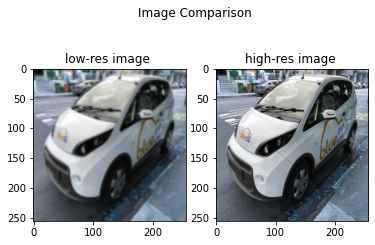

In [96]:
train_x.shape
assert (train_x.shape[0] == train_y.shape[0]), (f"{train_x.shape[0]} {train_y.shape[0]}")
print (train_x.shape)
print (train_x[0])


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image Comparison')
ax1.imshow(train_x[0])
ax1.title.set_text("low-res image ")
ax2.imshow(train_y[0])
ax2.title.set_text("high-res image ")

In [97]:
# Model Number 3 with batch normalization to go 2 levels deeper in expressiveness
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

@tf.function
def psnr_loss(input_img, decoded): 
    #y_pred = ops.convert_to_tensor_v2_with_dispatch(y_pred)
    #input_img = tf.cast(input_img, tf.float32)
    #decoded = tf.cast(decoded, tf.float32)
    #return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    
    #max_pixel = 255
    # loss = -(10.0 * tf.log((tf.reduce_mean(tf.square(input_img - decoded), axis=1)))) / 2.303
    #loss_mse = tf.keras.losses.mean_squared_error(input_img, decoded) 
    #return loss_mse  + tf.image.psnr(input_img, decoded, max_val=1)
    
    psnr = tf.image.psnr(input_img, tf.clip_by_value(decoded, clip_value_min=0., clip_value_max=1.), max_val=1)
    return tf.reduce_mean(psnr)
    
    #input_img = tf.cast(input_img, tf.float32)
    #return tf.reduce_mean(input_img - decoded)
    # return tf.reduce_mean(max_pixel_value / tf.squre(input_img - decoder))

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = 64
input_shape = (256, 256, 3)

encoder_inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
#x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
#x = layers.Reshape((7, 7, 64))(x)
#x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
#x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
#decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
x = layers.Dense(64 * 64 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((64, 64, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
#decoder_outputs = tf.slice(decoder_outputs, begin=[0, 0, 0, 0], size=[tf.shape(decoder_outputs)[0], 28, 28, 1])

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
    
    def call(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        return reconstruction
    
    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            #reconstruction_loss = tf.reduce_mean(
            #    tf.reduce_sum(
            #        keras.losses.mean_squared_error(data, reconstruction), axis=(1, 2)
            #    )
            mse = tf.keras.losses.MeanSquaredError()
            #reconstruction_loss = tf.reduce_mean(tf.reduce_mean(tf.square(data - reconstruction), axis=(1, 2, 3,)), axis=(0))
            reconstruction_loss = mse(data, reconstruction)
            
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
#data = train_x[np.arange(1)].copy() / 255
#data = np.expand_dims(data, -1).astype("float32") 
#if len(data.shape) == 5:
#    data = data.squeeze()
#if len(data.shape) == 3:
#    data = data[np.newaxis, :, :, :]

#print (data.shape)
# x_train.shape
model = VAE(encoder, decoder)
model.compile(optimizer=keras.optimizers.Adam(), loss=None)
#model.summary()


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 128, 128, 32) 896         input_41[0][0]                   
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 64, 64, 64)   18496       conv2d_64[0][0]                  
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 64, 64, 128)  73856       conv2d_65[0][0]                  
____________________________________________________________________________________________

In [98]:
def train(model, train_x, train_y, epochs = 1, batch_size = 32, shuffle = False):
    return model.fit(train_x, train_y,epochs=epochs,batch_size=batch_size,shuffle=shuffle, validation_data=(val_x, val_y))

In [108]:
# tf.debugging.set_log_device_placement(True)

history = train(model, train_x[1:2, :, :, :], train_y[1:2, :, :, :], epochs = 1000, batch_size = 10, shuffle = True)

Epoch 1/1000
1/1 [==============================] - 0s 431ms/step - loss: 0.0031 - reconstruction_loss: 0.0031 - kl_loss: 1.1623e-06 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 86ms/step - loss: 0.0044 - reconstruction_loss: 0.0044 - kl_loss: 2.9802e-07 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 86ms/step - loss: 0.0025 - reconstruction_loss: 0.0025 - kl_loss: 7.4506e-07 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.0030 - reconstruction_loss: 0.0030 - kl_loss: 1.7881e-07 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 83ms/step - loss: 0.0025 - reconstruction_lo

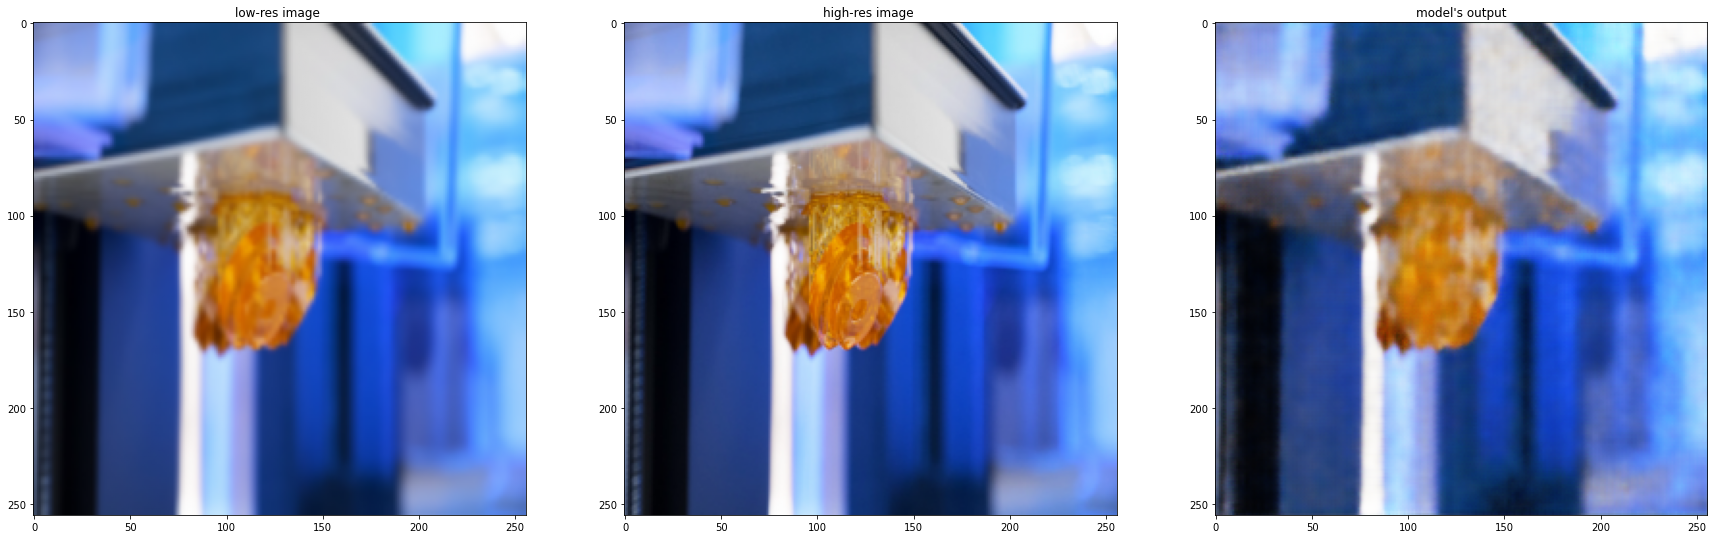

<Figure size 2880x2880 with 0 Axes>

In [109]:
val_pred = model.predict(train_x[1:2]) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(train_x[1])
ax1.title.set_text("low-res image ")
ax2.imshow(train_y[1])
ax2.title.set_text("high-res image ")
ax3.imshow(val_pred[0])
ax3.title.set_text("model's output")

In [91]:
print (train_x[1:2, 0:10, 0:10, :], val_pred[1:2, 0:10, 0:10, :])

[[[[0.43529412 0.49411765 0.71372549]
   [0.43529412 0.49411765 0.71372549]
   [0.44313725 0.49803922 0.71764706]
   [0.45490196 0.50980392 0.72156863]
   [0.4627451  0.51764706 0.72941176]
   [0.4745098  0.52941176 0.74117647]
   [0.48627451 0.5372549  0.75294118]
   [0.49411765 0.54509804 0.76470588]
   [0.50196078 0.55686275 0.77647059]
   [0.50588235 0.56470588 0.78431373]]

  [[0.43529412 0.49411765 0.71372549]
   [0.43529412 0.49411765 0.71372549]
   [0.44313725 0.49803922 0.71764706]
   [0.45490196 0.50980392 0.72156863]
   [0.4627451  0.51764706 0.72941176]
   [0.4745098  0.52941176 0.74117647]
   [0.48627451 0.5372549  0.75294118]
   [0.49411765 0.54509804 0.76470588]
   [0.50196078 0.55686275 0.77647059]
   [0.50588235 0.56470588 0.78431373]]

  [[0.43529412 0.49019608 0.70196078]
   [0.43529412 0.49019608 0.70196078]
   [0.44705882 0.50196078 0.70980392]
   [0.45882353 0.51372549 0.72156863]
   [0.47058824 0.5254902  0.7372549 ]
   [0.48235294 0.53333333 0.74901961]
   [0.49